In [15]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import sys
sys.path.append('../')
import function
from sklearn.preprocessing import MinMaxScaler

In [16]:
df = pd.read_excel('../VisitorEntrancesV3.xlsx')

In [17]:
df = df[df.Site_Name=='Hermon Stream (Banias)']
df = function.remove_unique_one(df)
df = df.drop(df.filter(regex='Season').columns, axis=1)
df = df.drop(df.filter(regex='Exceeded').columns, axis=1)
df = df.drop(df.filter(regex='isHeatwave').columns, axis=1)
df = df.replace({True:1,False:0})

In [18]:
dfWithoutLastYearVisits = df.drop('last_year_visitors',axis=1)
dfLastYearVisits = df.dropna()

In [19]:
print(dfLastYearVisits.shape)
print(dfWithoutLastYearVisits.shape)

(489, 8)
(1402, 7)


In [28]:
def mlrModelResTrainTestCoeff(dataframe,shaffle=False):
    dataframe.dropna(inplace=True)
    dataframe.sort_values('Date')
    y = dataframe[['Date','Israelis_Count']]
    X = dataframe.drop('Israelis_Count',axis=1)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=shaffle, test_size = 0.2, random_state=312148513)

    X_train_scaler = MinMaxScaler()
    X_test_scaler = MinMaxScaler()

    X_train_scaled = X_train_scaler.fit_transform(X_train.drop('Date',axis=1))
    X_test_scaled = X_test_scaler.fit_transform(X_test.drop('Date',axis=1))
    
    mlr = linear_model.LinearRegression()
    mlr.fit(X_train_scaled,y_train.Israelis_Count)
    
    prediction = mlr.predict(X_train_scaled)
    resTrain =  pd.DataFrame(
        data={
            'Prediction':prediction,
            'Actual': y_train.Israelis_Count.values    },
        index=y_train.Date
    )
    
    prediction = mlr.predict(X_test_scaled)
    resTest = pd.DataFrame(
        data={
            'Prediction':prediction,
            'Actual': y_test.Israelis_Count.values    },
        index=y_test.Date
    )
    coef = sorted( list(zip(np.round(mlr.coef_,5).T,X_train.drop("Date",axis=1).columns)))
    d = {}
    for tup in coef:
        d[tup[-1]] = tup[0]
    coefDF = pd.DataFrame.from_dict(d,orient='index')
    
    return resTrain,resTest,coefDF
    
def printRes(res ,plotLine=True ,plotResiduals = False):
    res = res.sort_index()
    print('rmse',function.get_rmse(res.Prediction, res.Actual))
    print('std',np.std(res.Actual))
    
    if plotResiduals:
        function.plot_residuals(actual=y_train.Israelis_Count,prediction=prediction)
    if plotLine:
        function.plot_line(actual=res.Actual,prediction=res.Prediction)
        
    print('Sample rows:')
    print( res.sample(10))

In [29]:
resTrain,resTest,coeffDf = mlrModelResTrainTestCoeff(dfLastYearVisits)

C:\Users\Avivsa\AppData\Local\Temp\ipykernel_5804\1564167282.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.dropna(inplace=True)


                            0
pm10               -151.52970
IsVacation          -88.57879
Temperature         -58.05120
is_weekend          157.86990
IsHoliday           334.74152
last_year_visitors  930.88958

rmse 651.3382599838604
std 685.817797847391


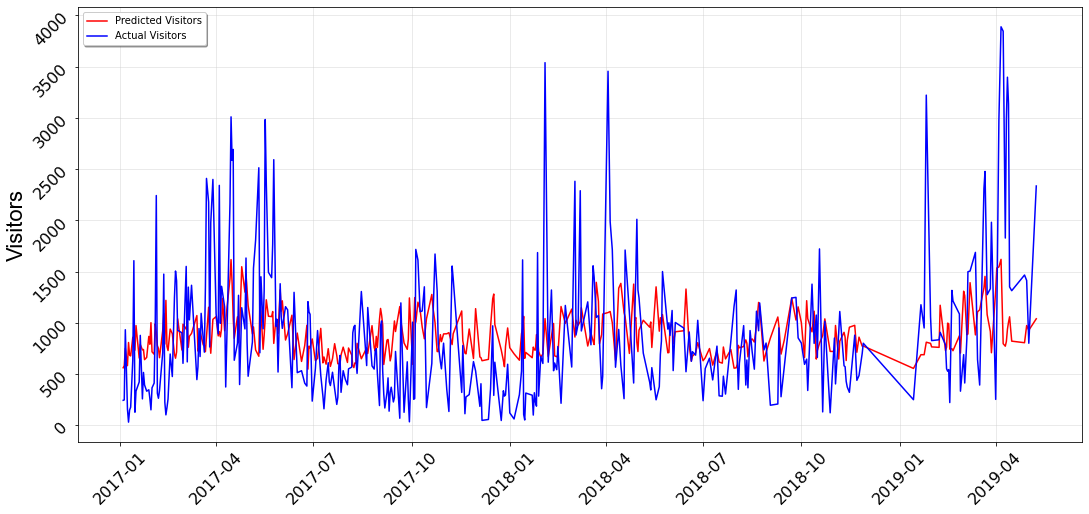

Sample rows:
             Prediction  Actual
Date                           
2017-05-31  1320.652023    1381
2019-03-13   881.440152    1687
2018-08-27   626.446687     735
2017-05-01  1168.768114     478
2018-05-12   956.813034     419
2018-09-09  1056.241619     207
2017-01-05   581.440627     247
2018-04-30   809.356202    2010
2018-01-16   710.411584     314
2017-03-17   920.916877     670

rmse 540.1539894993193
std 520.0167628773802


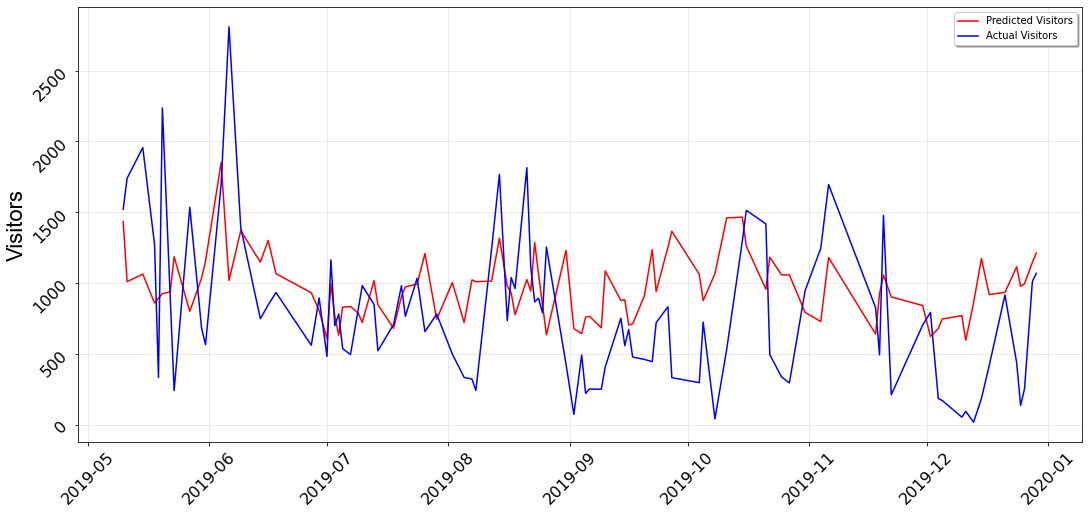

Sample rows:
             Prediction  Actual
Date                           
2019-12-17   918.167421     418
2019-08-12  1012.972451    1237
2019-08-14  1316.400034    1766
2019-08-18   775.454050     961
2019-09-04   641.873946     491
2019-05-15  1062.780086    1956
2019-07-20   902.990041     980
2019-11-18   639.333686     825
2019-10-21   955.707463    1417
2019-05-22   937.023472     900


In [30]:
print(coeffDf)
print()

printRes(resTrain)
print()

printRes(resTest)

                     0
pm10         -92.03045
IsVacation   -69.02340
is_weekend   144.64902
Temperature  283.62680
IsHoliday    446.20859

rmse 567.4901411810033
std 594.2599334179291


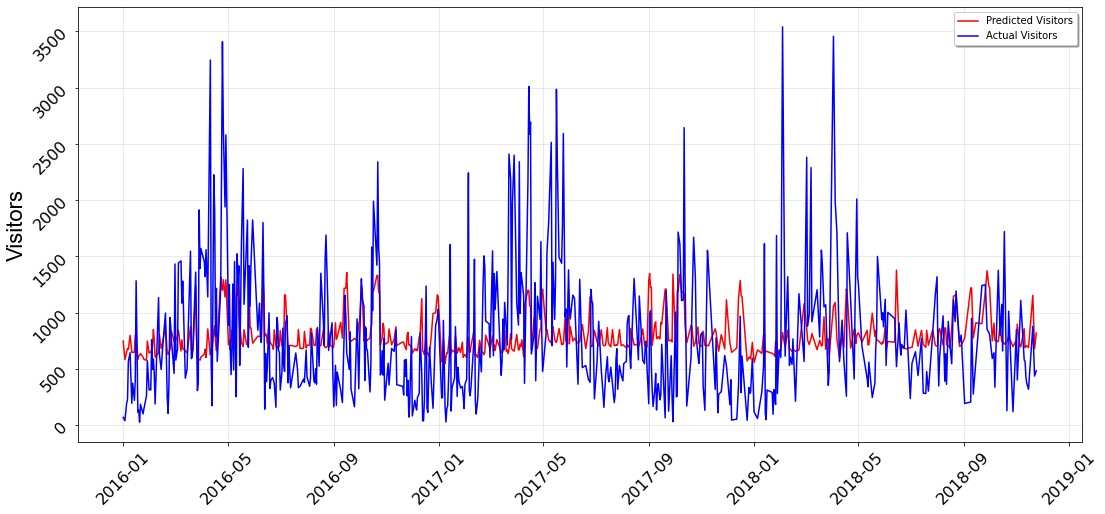

Sample rows:
            Prediction  Actual
Date                          
2016-12-07  662.677555     249
2018-02-01  663.945721     603
2017-07-25  715.208564     584
2018-05-22  843.551865     692
2017-03-23  677.190655    2409
2017-03-01  668.939045     604
2016-08-17  708.156080    1351
2017-04-25  684.249481    1147
2016-01-25  586.217827     146
2017-03-17  797.017333     670

rmse 785.1923640460358
std 759.4982519516309


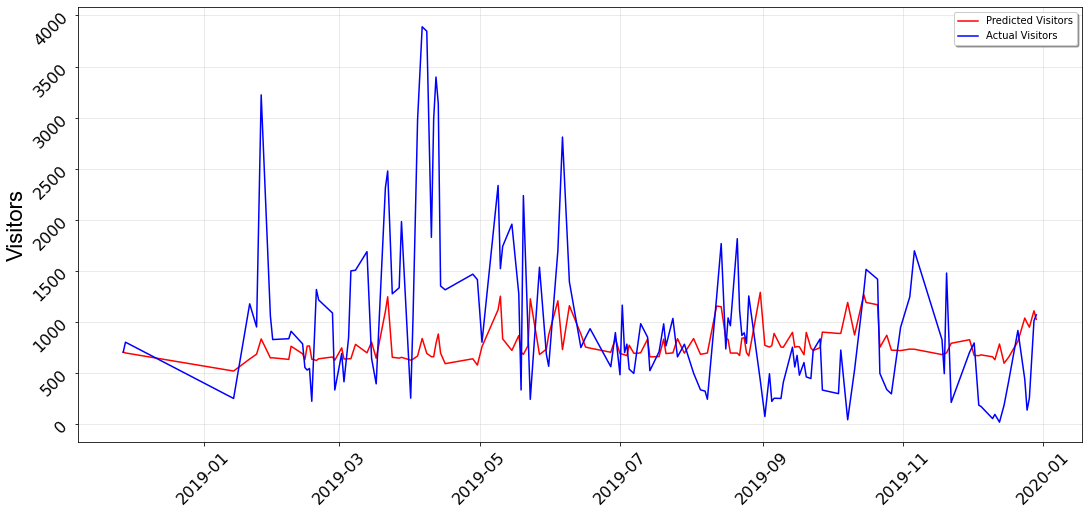

Sample rows:
             Prediction  Actual
Date                           
2019-03-17   642.231318     392
2019-11-04   732.470895    1244
2019-05-31   871.120229     564
2019-01-14   517.486651     249
2019-11-22   789.375362     210
2019-06-16   752.630717     845
2019-09-16   757.594673     671
2019-11-06   730.917306    1695
2019-10-21  1166.726744    1417
2019-09-06   885.696865     251


In [31]:
resTrain,resTest,coeffDf = mlrModelResTrainTestCoeff(dfWithoutLastYearVisits)
print(coeffDf)
print()

printRes(resTrain)
print()

printRes(resTest)